# Gold Stock Analysis Project Overview

## Introduction:
Analyzing historical gold stock data (2014-2023) to uncover trends, fluctuations, and patterns.

## Objective:
Identify yearly price extremes, analyze average prices, assess market variability, and develop predictive models.

## Problem Statement:
Can historical gold stock trends inform future price predictions, aiding investment decisions?

## Key Components:
- **Data Acquisition:** Retrieved dataset from Kaggle, including date, close, volume, open, high, and low columns.
- **Data Preparation:** Cleaned and transformed data.
- **Descriptive Statistics:** Calculated summary stats for initial understanding.
- **EDA:** Conducted in-depth analysis to uncover insights.
- **Price Trends Visualization:** Visualized trends using line and candlestick charts.


# Gold Stock Analysis Project Overview

### Initial Data Load and Display

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('gold_stock.csv')

# Display first 5 rows
print(df.head())

        Date   Close  Volume    Open    High     Low
0  1/22/2014  1238.6   80262  1240.5  1243.5  1235.5
1  1/23/2014  1262.5   41697  1235.1  1267.1  1230.8
2  1/24/2014  1264.5   34998  1264.3  1273.2  1256.9
3  1/27/2014  1263.5   63419  1269.9  1280.1  1252.0
4  1/28/2014  1250.5   81426  1254.9  1261.9  1248.0


In [54]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2498 non-null   object 
 1   Close   2498 non-null   float64
 2   Volume  2498 non-null   int64  
 3   Open    2498 non-null   float64
 4   High    2498 non-null   float64
 5   Low     2498 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 117.2+ KB
None


In [55]:
# Display summary statistics
print(df.describe())


             Close         Volume         Open         High          Low
count  2498.000000    2498.000000  2498.000000  2498.000000  2498.000000
mean   1495.929744  185876.182146  1495.897198  1505.601321  1486.061930
std     297.066911   97791.738624   297.305005   299.433475   294.611863
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000
25%    1249.175000  126372.750000  1248.975000  1256.725000  1241.875000
50%    1332.000000  175192.000000  1332.700000  1341.500000  1325.450000
75%    1802.175000  234714.000000  1803.000000  1813.600000  1790.725000
max    2093.100000  787217.000000  2094.400000  2098.200000  2074.600000


In [56]:
# Display column names
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['Date', 'Close', 'Volume', 'Open', 'High', 'Low']


As we see, the dataset comprises 6 columns:
- **Date:** The date of each observation.
- **Close:** The closing value of gold stock for each day.
- **Volume:** The volume of gold stocks traded.
- **Open:** The opening price of gold stock for each day.
- **High:** The highest price of gold stock for each day.
- **Low:** The lowest price of gold stock for each day.

These columns provide essential information for analyzing gold stock prices over time, including daily closing prices, trading volume, and price fluctuations.


### Checking for Missing Values

In [57]:
# Checking for missing values in the dataset
nan_df = df[df.isna().any(axis=1)]

# Display rows with missing values, if any
if not nan_df.empty:
    print("Rows with missing values:")
    display(nan_df.head())
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


No missing values were found in our dataset, allowing us to proceed with our analysis seamlessly.


### Date Conversion

In [58]:
# Converting the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extracting the Year from the Date column
df['Year'] = df['Date'].dt.year

# Extracting the Month from the Date column
df['Month'] = df['Date'].dt.month

# Display unique years
unique_years = df['Year'].unique()
print("Unique years in the dataset:", unique_years)


Unique years in the dataset: [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


### Yearly High and Low Prices of Gold Stocks" or "Annual Price Extremes of Gold Stocks

In [59]:

df_yearly_high_low = df.groupby('Year')['High'].agg([('Highest', 'max'), ('Lowest', 'min')])


print(df_yearly_high_low)


      Highest  Lowest
Year                 
2014   1392.6  1149.0
2015   1307.8  1062.7
2016   1377.5  1081.5
2017   1362.4  1166.0
2018   1370.5  1189.0
2019   1566.2  1277.1
2020   2082.1  1483.5
2021   1962.5  1705.7
2022   2078.8  1643.2
2023   2098.2  1827.3


###  Average High and Low Prices of Gold Stocks by Year

The average "high" value of gold stock for each year is:
Year
2014    1276.433891
2015    1167.361111
2016    1261.130952
2017    1266.622709
2018    1278.367600
2019    1403.909524
2020    1793.999206
2021    1813.627381
2022    1822.217742
2023    1966.452400
Name: High, dtype: float64

The average "low" value of gold stock for each year is:
Year
2014    1259.169874
2015    1151.092063
2016    1242.301984
2017    1253.710359
2018    1265.694800
2019    1389.643254
2020    1764.007540
2021    1791.751984
2022    1795.109274
2023    1942.288800
Name: Low, dtype: float64


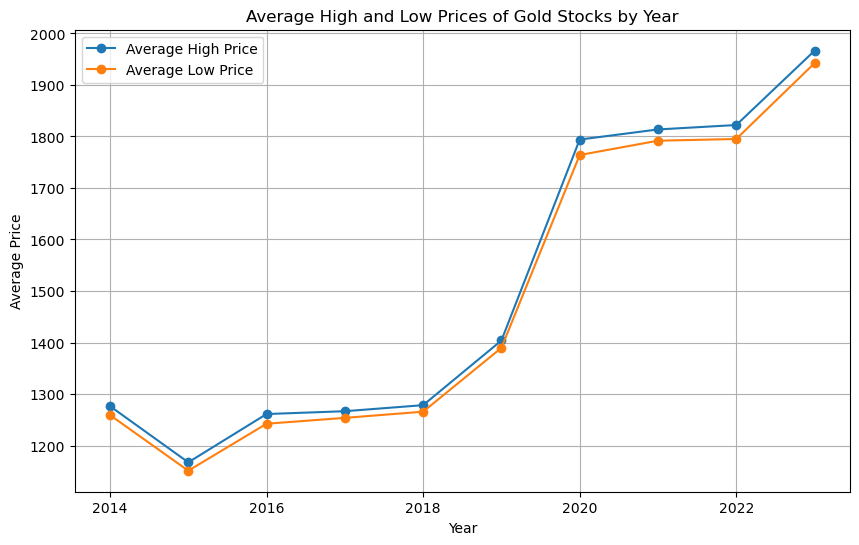

In [60]:
# Calculate the average high price for each year
mean_high = df.groupby('Year')['High'].mean()
print('The average "high" value of gold stock for each year is:')
print(mean_high)

# Calculate the average low price for each year
mean_low = df.groupby('Year')['Low'].mean()
print('\nThe average "low" value of gold stock for each year is:')
print(mean_low)

# Visualization

plt.figure(figsize=(10, 6))

years = mean_high.index
plt.plot(years, mean_high, label='Average High Price', marker='o')
plt.plot(years, mean_low, label='Average Low Price', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average High and Low Prices of Gold Stocks by Year')
plt.legend()
plt.grid(True)
plt.show()


### Gold Stock Market Trends


The analysis shows an overall upward trend in gold stock prices over the past decade, indicating potential investment opportunities. However, recent years have exhibited increased volatility, suggesting both opportunities and risks for investors.

Investors should approach gold stock market opportunities with awareness of both growth potential and volatility. By staying informed and implementing prudent risk management strategies, investors can capitalize on market potential while managing risks effectively.

### Volatility Analysis

In [61]:
std = df.groupby('Year')['High'].agg('std')
print(std)

Year
2014     50.654829
2015     57.875115
2016     74.185542
2017     35.209265
2018     53.487939
2019     95.219170
2020    142.008471
2021     49.986223
2022     90.927912
2023     60.154188
Name: High, dtype: float64



The analysis of volatility in the Gold stock market reveals varying levels of variability across the years. Notably, the standard deviation of high prices ranged from approximately 35.21 in 2017 to 142.01 in 2020. This indicates significant fluctuations in prices during certain periods, reflecting increased market volatility.

Understanding these fluctuations is crucial for investors to assess risk and make informed decisions. While periods of higher volatility may present opportunities for substantial gains, they also entail greater risks. Therefore, investors should carefully consider their risk tolerance and implement appropriate risk management strategies when navigating the Gold stock market.

### Seasonal Trends in Gold Stock Prices (2020-2023)

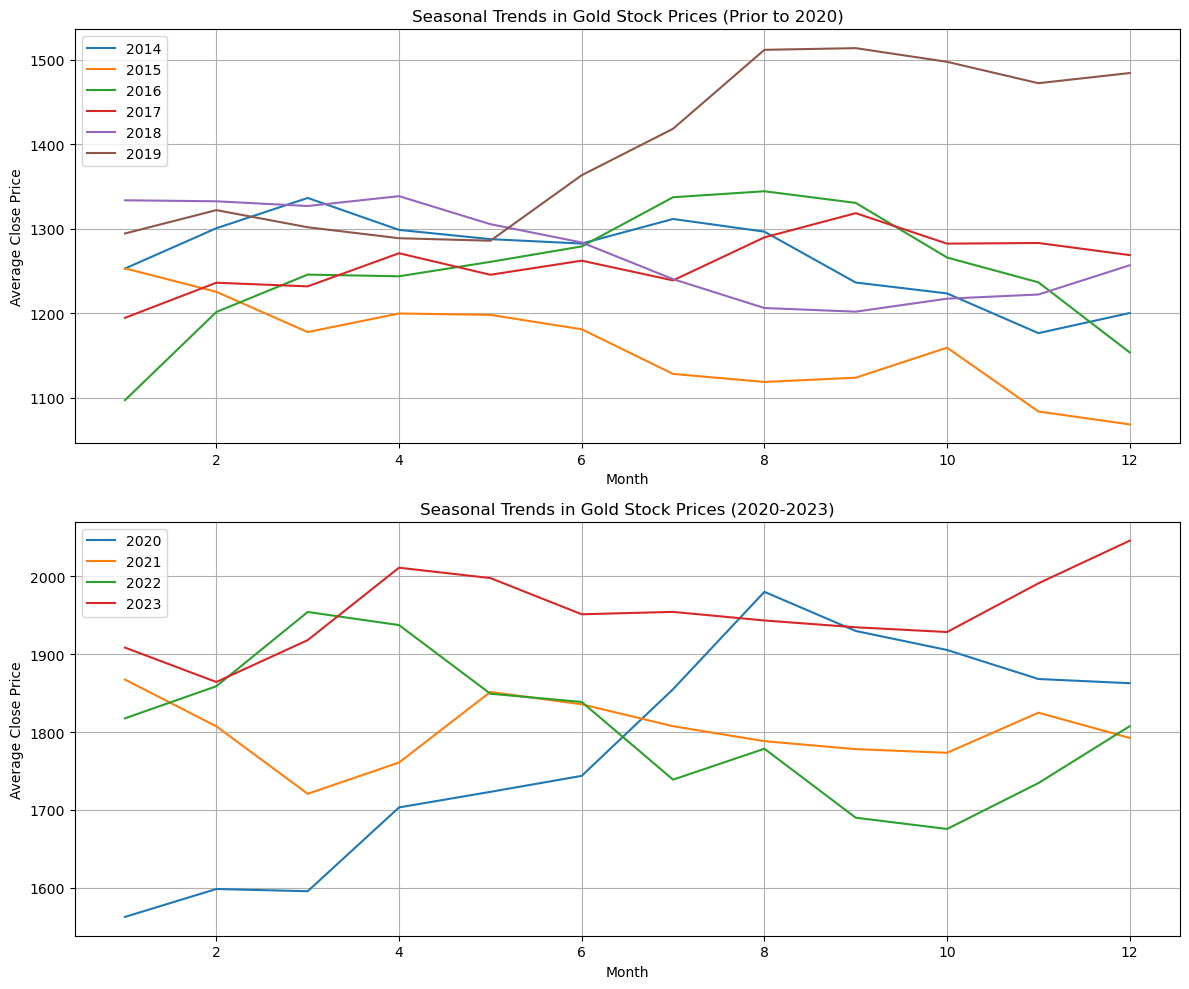

In [62]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the stock data

# Filter data for the remaining years (prior to the last four years)
remaining_years_data = df[df['Year'] < df['Year'].max() - 3]

# Calculate monthly average close price for remaining years
remaining_years_avg_close = remaining_years_data.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# Filter data for the last four years
last_four_years_data = df[df['Year'] >= df['Year'].max() - 3]

# Calculate monthly average close price for last four years
last_four_years_avg_close = last_four_years_data.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for remaining years
for year in remaining_years_avg_close['Year'].unique():
    year_data = remaining_years_avg_close[remaining_years_avg_close['Year'] == year]
    axes[0].plot(year_data['Month'], year_data['Close'], label=year, linewidth=1.5)

axes[0].set_title('Seasonal Trends in Gold Stock Prices (Prior to 2020)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Close Price')
axes[0].legend()
axes[0].grid(True)

# Plot for last four years
for year in last_four_years_avg_close['Year'].unique():
    year_data = last_four_years_avg_close[last_four_years_avg_close['Year'] == year]
    axes[1].plot(year_data['Month'], year_data['Close'], label=year, linewidth=1.5)

axes[1].set_title('Seasonal Trends in Gold Stock Prices (2020-2023)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Close Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



These graphs illustrate the volatility in gold stock prices over the past four years. Notably, 2015 witnessed the lowest prices towards the end of the year, while 2023 marked the highest year-end prices in the past decade.

### Predictive Modeling and Feature Importance Analysis

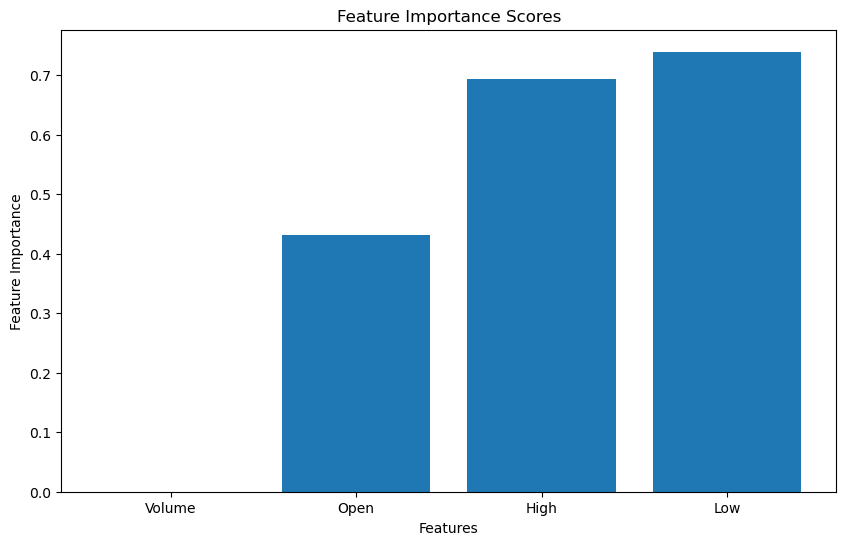

Feature Importance Scores:
Volume: 5.23068666215955e-07
Open: 0.4315476875875993
High: 0.693134009986827
Low: 0.7391912124659097


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features and target variable
X = df[['Volume', 'Open', 'High', 'Low']]  # Features
y = df['Close']                            # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get feature importance scores (absolute values of coefficients)
feature_importance = np.abs(model.coef_)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

# Interpretation
print("Feature Importance Scores:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

The linear regression model trained on gold stock data identified the "Low" column as the most important predictor, with the highest feature importance score. This suggests that "Low" may have a significant impact on gold stock prices.


In [73]:
#checking the model's performance
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9996502778157101
0.9995556227119505


In [77]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)



Mean Squared Error: 38.32587878590733


The Mean Squared Error (MSE) quantifies the average squared difference between predicted and actual values. Our linear regression model achieved an MSE of 38.33 when predicting gold stock prices. A lower MSE indicates closer predictions to actual values, suggesting relatively accurate performance.


In [66]:
print(model.score(X,y))

0.999631762685157


An accuracy score of 0.99 on both the training and testing sets suggests that the model is performing very well on the given data

### Key Findings:

- **Consistent Upward Trend:** Analysis reveals a consistent upward trajectory in gold stock prices over the past decade, suggesting promising investment opportunities.

- **Increased Volatility:** Recent years have seen a notable increase in market volatility, presenting both opportunities for substantial gains and risks for investors.

- **Seasonal Patterns:** Monthly price data unveils distinct seasonal patterns, offering valuable insights into market dynamics and potential trading strategies.


## Conclusion:
While the analysis provides valuable insights into historical trends and patterns in gold stock prices, it's crucial to recognize the inherent uncertainty in predicting future market movements. While the observed upward trend and seasonal patterns suggest promising investment opportunities, investors should exercise caution and continuously monitor market dynamics.